In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- In every dataset we have different columns has different units

- In every dataset we have have different columns has values varies from -infinity to infinity

- It is very important standardize the data, make sure all the columns values under same range

- To achive this we have two methods:
    
    - Normalization
    
    - Standardization

**Normalization:**

- min max scalar

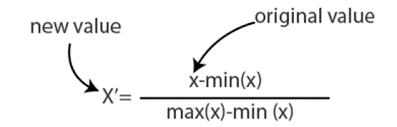

**Standardization**

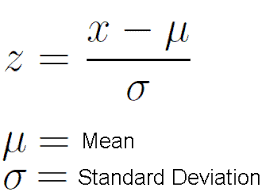

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
# step-1: calcualte min value
# step-2: calculayte max value
# step-3: Dr=max_wage - min_wage
# step-4: Nr=visa_df['prevailing_wage'] - min_wage

In [5]:
Min=round(visa_df['prevailing_wage'].min(),2)
Max=round(visa_df['prevailing_wage'].max(),2)
Dr=Max-Min
Nr=visa_df['prevailing_wage']-Min
visa_df['prevailing_wage_norm']=Nr/Dr
visa_df['prevailing_wage_norm']

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage_norm, Length: 25480, dtype: float64

In [6]:
visa_df[['prevailing_wage','prevailing_wage_norm']]

,prevailing_wage,prevailing_wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [7]:
visa_df['prevailing_wage_norm'].max(),visa_df['prevailing_wage_norm'].min()

(1.0, -1.033808255447724e-08)

In [8]:
visa_df['prevailing_wage'].max(),visa_df['prevailing_wage'].min()

(319210.27, 2.1367)

In [9]:
max_id=visa_df['prevailing_wage_norm'].idxmax()
min_id=visa_df['prevailing_wage_norm'].idxmin()
max_id,min_id

(21077, 20575)

In [10]:
visa_df[['prevailing_wage','prevailing_wage_norm']].iloc[[max_id,min_id]]

,prevailing_wage,prevailing_wage_norm
21077,319210.2700,1.000000e+00
20575,2.1367,-1.033808e-08


**MinMaxScalar**

- MinMaxScalar is a method from sklearn preprocessing
- Read the packlages
- Save the packages
- Apply fit transform

In [11]:
############################# Read the Data########################

file_path="C:\\Users\\hp\\Downloads\\Visadataset - Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df
# step:-1
from sklearn.preprocessing import MinMaxScaler
# step:-2
mms=MinMaxScaler()
# step:-3
visa_df['prevailing_wage_norm1']=mms.fit_transform(visa_df[['prevailing_wage']])



In [12]:
visa_df[['prevailing_wage_norm1','prevailing_wage']]

,prevailing_wage_norm1,prevailing_wage
0,0.001849,592.2029
1,0.261345,83425.6500
2,0.385312,122996.8600
3,0.261371,83434.0300
4,0.469616,149907.3900
...,...,...
25475,0.241505,77092.5700
25476,0.874579,279174.7900
25477,0.458311,146298.8500
25478,0.269895,86154.7700


In [13]:
# array

v1=np.array([[[1,2,3,4]]])
v1.ndim

3

In [14]:
### Z Score

# step:1 calculate mean
# step:2 calculate std
# step:3 Nr= x-mean
# step:4 Nr/std

In [15]:
mean=round(visa_df['prevailing_wage'].mean(),2)
std=round(visa_df['prevailing_wage'].std(),2)

In [16]:
z_score=(visa_df['prevailing_wage']-mean)/std
visa_df['wage_standardization']=z_score
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,prevailing_wage_norm1,wage_standardization
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,0.001849,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.261345,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.385312,0.919061
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.261371,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,0.469616,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.241505,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,0.874579,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,0.458311,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.269895,0.221504


In [17]:
visa_df[['prevailing_wage','wage_standardization']]

,prevailing_wage,wage_standardization
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919061
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


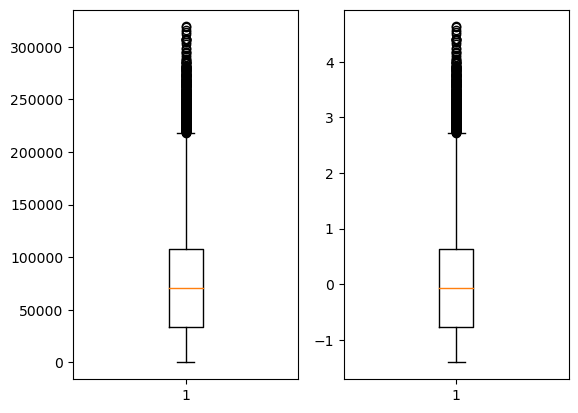

In [18]:
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2)
plt.boxplot(visa_df['wage_standardization'])
plt.show()


**StandardScalar**

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
visa_df=pd.read_csv(file_path)

In [20]:
wage_ss=ss.fit_transform(visa_df[['prevailing_wage']])
wage_ss

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

In [21]:
visa_df['wage_standard']=wage_ss
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,wage_standard
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398537
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169835
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919079
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169994
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428604
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049924
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876159
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360280
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221509
